In [23]:
import numpy
import math
import matplotlib.pyplot as plt
import scipy.special

Maclaurin series for $\sin(x)$ is:
\begin{align}
\sin(x)
&= \sum_{k=0}^{\infty} \frac{ (-1)^k }{ (2k+1)! } x^{2k+1} \\
&= x - \frac{1}{3!} x^3 + \frac{1}{5!} x^5 - \frac{1}{7!} x^7 + \frac{1}{9!} x^9 - \frac{1}{11!} x^{11} +\ldots \\
%%% &= x \left( 1 - \frac{1}{2.3} x^2 \left( 1 - \frac{1}{4.5} x^2 \left( 1 - \frac{1}{6.7} x^2 \left(1 - \frac{1}{8.9} x^2 \left( 1 - \frac{1}{10.11} x^{2} \left( \ldots \right) \right) \right) \right) \right) \right) \\
&= x \left( 1 - \frac{1}{2.3} x^2 \right) + \frac{1}{5!} x^5 \left( 1 - \frac{1}{6.7} x^2 \right)
     + \frac{1}{9!} x^9 \left( 1 - \frac{1}{10.11} x^2 \right) + \ldots \\
&= \sum_{k=0}^{\infty} \frac{x^{4k+1}}{(4k+1)!} \left( 1 - \frac{x^2}{(4k+2)(4k+3)} \right) \\
&= x \sum_{k=0}^{\infty} \frac{x^{4k}}{(4k+1)!} \left( 1 - \frac{x^2}{(4k+2)(4k+3)} \right)
\end{align}
The 
roundoff error is associated with the addition/subtraction involving the largest term which (for $|x|<6$) will be the first term, so of order $|x|\epsilon$.

epsilon = 2.22e-16 = 2**-52


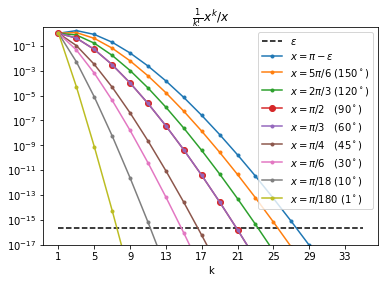

In [104]:
# Significance of each term to final result
n, eps = numpy.arange(1,36,2), numpy.finfo(float).eps
print('epsilon = %.2e'%eps, "= 2**%i"%int(math.log(eps)/math.log(2)))
plt.semilogy(n, eps * (1+0*n), 'k--', label=r'$\epsilon$' )
plt.semilogy(n, (numpy.pi-eps)**n / scipy.special.factorial(n) / numpy.pi, '.-', label=r'$x=\pi-\epsilon$' );
plt.semilogy(n, (numpy.pi/6*5)**n / scipy.special.factorial(n) / (numpy.pi/6*5), '.-', label=r'$x=5\pi/6$ (150$^\circ$)' );
plt.semilogy(n, (numpy.pi/3*2)**n / scipy.special.factorial(n) / (numpy.pi/3*2), '.-', label=r'$x=2\pi/3$ (120$^\circ$)' );
plt.semilogy(n, (numpy.pi/2)**n / scipy.special.factorial(n) / (numpy.pi/2), 'o-', label=r'$x=\pi/2$   (90$^\circ$)' );
plt.semilogy(n, (numpy.pi/2)**n / scipy.special.factorial(n) / (numpy.pi/2), '.-', label=r'$x=\pi/3$   (60$^\circ$)' );
plt.semilogy(n, (numpy.pi/4)**n / scipy.special.factorial(n) / (numpy.pi/4), '.-', label=r'$x=\pi/4$   (45$^\circ$)' );
plt.semilogy(n, (numpy.pi/6)**n / scipy.special.factorial(n) / (numpy.pi/6), '.-', label=r'$x=\pi/6$   (30$^\circ$)' );
plt.semilogy(n, (numpy.pi/18)**n / scipy.special.factorial(n) / (numpy.pi/18), '.-', label=r'$x=\pi/18$ (10$^\circ$)' );
plt.semilogy(n, (numpy.pi/180)**n / scipy.special.factorial(n) / (numpy.pi/180), '.-', label=r'$x=\pi/180$ (1$^\circ$)' );
plt.gca().set_xticks(numpy.arange(1,36,4)); plt.legend(); plt.xlabel('k'); plt.ylim(1e-17,3); plt.title(r'$\frac{1}{k!}x^k/x$');

In [138]:
# Coefficients in series
print(' k','%20s'%'Denominator','%21s'%'Coefficient','Factor','Multiplier')
for k in range(1,23,2):
    print('%2i'%k, '%20i'%math.factorial(k), '%.16e'%(1./math.factorial(k)),'%5i'%((k+1)*(k+2)),'%.16e'%(1./((k+1)*(k+2))))

 k          Denominator           Coefficient Factor Multiplier
 1                    1 1.0000000000000000e+00     6 1.6666666666666666e-01
 3                    6 1.6666666666666666e-01    20 5.0000000000000003e-02
 5                  120 8.3333333333333332e-03    42 2.3809523809523808e-02
 7                 5040 1.9841269841269841e-04    72 1.3888888888888888e-02
 9               362880 2.7557319223985893e-06   110 9.0909090909090905e-03
11             39916800 2.5052108385441720e-08   156 6.4102564102564100e-03
13           6227020800 1.6059043836821613e-10   210 4.7619047619047623e-03
15        1307674368000 7.6471637318198164e-13   272 3.6764705882352941e-03
17      355687428096000 2.8114572543455206e-15   342 2.9239766081871343e-03
19   121645100408832000 8.2206352466243295e-18   420 2.3809523809523812e-03
21 51090942171709440000 1.9572941063391263e-20   506 1.9762845849802370e-03


In [166]:
def sin_by_series(x,n=20,verbose=False,method='simple-explicit'):
    """Returns sin(x)"""
    # https://en.wikipedia.org/wiki/Sine#Series_definition
    C=[0.16666666666666667,
       0.05,
       0.023809523809523808,
       0.013888888888888889,
       0.009090909090909091,
       0.00641025641025641,
       0.004761904761904762,
       0.003676470588235294,
       0.0029239766081871343,
       0.002380952380952381,
       0.001976284584980237,
       0.0016666666666666667,
       0.0014245014245014246,
       0.0012315270935960591,
       0.001075268817204301,
       0.000946969696969697,
       0.0008403361344537816,
       0.0007507507507507507,
       0.0006747638326585695]
    if method=='simple-explicit':
        # Adds terms from largest to smallest until answer is not changing
        ro,f,s = x,1.,-1.
        for k in range(3,200,2):
            f = 1./ math.factorial(k)
            r = ro + x**k * f * s
            if verbose: print('sine:',r,'(%i)'%k)
            if r==ro: break
            ro,s = r, -s
    elif method=='accurate-explicit':
        # Adds terms from smallest to largest after finding smallest term to add
        ro,s = x,-1.
        for k in range(3,200,2):
            f = 1./ math.factorial(k)
            r = ro + x**k * f * s
            if r==ro: break
            ro,s = r, -s
        ro = 0.
        for j in range(k,0,-2):
            f = 1./ math.factorial(j)
            r = ro + x**j * f * s
            if verbose: print('sine:',r,'(%i)'%j)
            if r==ro: break
            ro,s = r, -s
    elif method=='simple-precomputed':
        # Adds terms from largest to smallest until answer is not changing
        ro,f,s = x,1.,-1.
        for i in range(1,n):
            k = 2*i + 1
            #f = f * pypi.reciprocal( (k-1)*k ) # These should be pre-computed
            f = f * C[i-1]
            r = ro + x**k * f * s
            if verbose: print('sine:',r,'(%i)'%i)
            if r==ro: break
            ro,s = r, -s
    elif method=='accurate-fixed':
        # Adds fixed number of terms from smallest to largest 
        f,r,s = [1.]*(n),0.,1.
        if n%2==0: s=-1.
        for i in range(1,n):
            f[i] = f[i-1] * C[i-1]
        for i in range(n-1,0,-1):
            k = 2*i + 1
            r = r + x**k * f[i] * s
            if verbose: print('sine:',r,'(%i)'%i)
            s = -s
        r = r + x
        if verbose: print('sine:',r,'(%i)'%i)
    else:
        raise Exception('Method "'+method+'" not implemented')
    return r
angle = numpy.pi/4*2
print( sin_by_series( angle, method='simple-explicit' ) )
print( sin_by_series( angle, method='simple-precomputed' ) )
print( sin_by_series( angle, method='accurate-explicit' ) )
print( sin_by_series( angle, method='accurate-fixed' ) )
print( sin_by_series( angle, method='accurate-fixed', n=7 ) )


1.0000000000000002
1.0000000000000002
1.0
1.0
1.00000000066278
